In [3]:
import pandas
from pycaret.regression import *
import matplotlib.pyplot as plt
import numpy

data = pandas.read_csv('hour_wise_kwh_usage.csv')
data['datetime'] = pandas.to_datetime(data['datetime'])
print(data.head())
data['HOUR'] = [i.hour for i in data['datetime']]
data['DAY'] = [i.day for i in data['datetime']]
data['MONTH'] = [i.month for i in data['datetime']]
data['YEAR'] = [i.year for i in data['datetime']]

# because months are cyclic eg January is close to December but the values are opposite
# data['DATA_MONTH_SIN'] = data["month_cos"] = np.sin(2*np.pi*data['MONTH']  / len(set(data['MONTH'] )))
# data['DATA_MONTH_COS'] = data["month_cos"] = np.cos(2*np.pi*data['MONTH']  / len(set(data['MONTH'] )))
# data = data[['YEAR', 'MONTH', 'DATA_MONTH_SIN', 'DATA_MONTH_COS' , 'LME_CS','LME_3MONTH',  'LME_STOCK',  'EP_EU_NONH', 'ORDERS']]

data = data[['YEAR', 'MONTH' , 'DAY', 'HOUR', 'kwh']]

#try whatever here you think will work better. Testing only in 2023 give weird results 
train = data[data['YEAR'] < 2024 and data['MONTH'] < 2]
test = data[data['YEAR'] >= 2024 and data['MONTH'] >= 2]


s = setup(
    data = train,
    test_data = test,
    target = 'ORDERS',
    fold_strategy = 'timeseries',
    data_split_shuffle=False,
    fold_shuffle=False,
    numeric_features = ['YEAR', 'MONTH', 'LME_CS','LME_3MONTH','LME_STOCK','EP_EU_NONH'],
    fold=3,
    transform_target = False,
    session_id = 123
)

# best model bases on 'sort' metric put whatever here eg. MSE RMSE etc
best = compare_models(sort = 'MAE',exclude=['lightgbm']) # for some reason lightgbm fail to train , pops a warning


              datetime       kwh                DATE
0  2022-03-21 00:00:00  1.055406 2022-03-21 00:00:00
1  2022-03-21 01:00:00  1.039961 2022-03-21 01:00:00
2  2022-03-21 02:00:00  1.194756 2022-03-21 02:00:00
3  2022-03-21 03:00:00  1.194441 2022-03-21 03:00:00
4  2022-03-21 04:00:00  1.103416 2022-03-21 04:00:00


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# all metrics of all models
model_metrics = pull()
model_metrics

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,17.8900,682.7503,24.0211,-0.1406,0.4946,0.3729,0.0800
gbr,Gradient Boosting Regressor,18.0510,659.5615,24.1251,-0.2562,0.5487,0.3884,0.0233
par,Passive Aggressive Regressor,18.5017,750.4870,25.4512,-0.3149,0.5327,0.3853,0.0100
ada,AdaBoost Regressor,18.6162,726.7578,25.3744,-0.3761,0.5810,0.3940,0.0333
xgboost,Extreme Gradient Boosting,18.6846,751.9295,25.0928,-0.2608,0.5636,0.4040,0.0533
et,Extra Trees Regressor,19.5890,620.5724,23.8462,-0.2458,0.5551,0.4685,0.0800
br,Bayesian Ridge,19.7121,867.2583,25.6435,-0.1829,0.5316,0.4195,0.0133
omp,Orthogonal Matching Pursuit,19.7160,867.7789,25.6491,-0.1833,0.5318,0.4194,0.0100
knn,K Neighbors Regressor,19.8571,848.6190,25.7705,-0.2146,0.5447,0.4314,0.0433
dummy,Dummy Regressor,20.1678,936.9962,27.2570,-0.3690,0.5709,0.4213,0.0100


In [ ]:
#run the best model on test data
prediction_holdout = predict_model(best) 
actual_values = prediction_holdout['ORDERS']
predicted_values = prediction_holdout['prediction_label']

In [ ]:
prediction_holdout

,YEAR,MONTH,LME_CS,LME_3MONTH,LME_STOCK,EP_EU_NONH,ORDERS,prediction_label
28,2022,1,3003.080078,3000.080078,878431,0.1604,41,84.41
29,2022,2,3260.830078,3224.179932,822859,0.1604,95,84.51
30,2022,3,3537.850098,3542.929932,731828,0.1604,60,85.09
31,2022,4,3256.580078,3276.110107,601939,0.1604,9,85.08
32,2022,5,2826.360107,2854.790039,523715,0.1604,27,53.19
33,2022,6,2562.929932,2585.030029,410669,0.1604,32,39.66
34,2022,7,2401.570068,2407.929932,331148,0.1986,6,44.51
35,2022,8,2431.320068,2424.110107,281315,0.1986,26,43.86
36,2022,9,2229.909912,2243.070068,327167,0.1986,80,36.03
37,2022,10,2243.290039,2249.620117,449599,0.1986,40,36.51


In [ ]:
# metrics of the best model in test data
model_metrics = pull()
model_metrics

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,23.309,853.0465,29.207,-0.5247,0.8188,1.2703


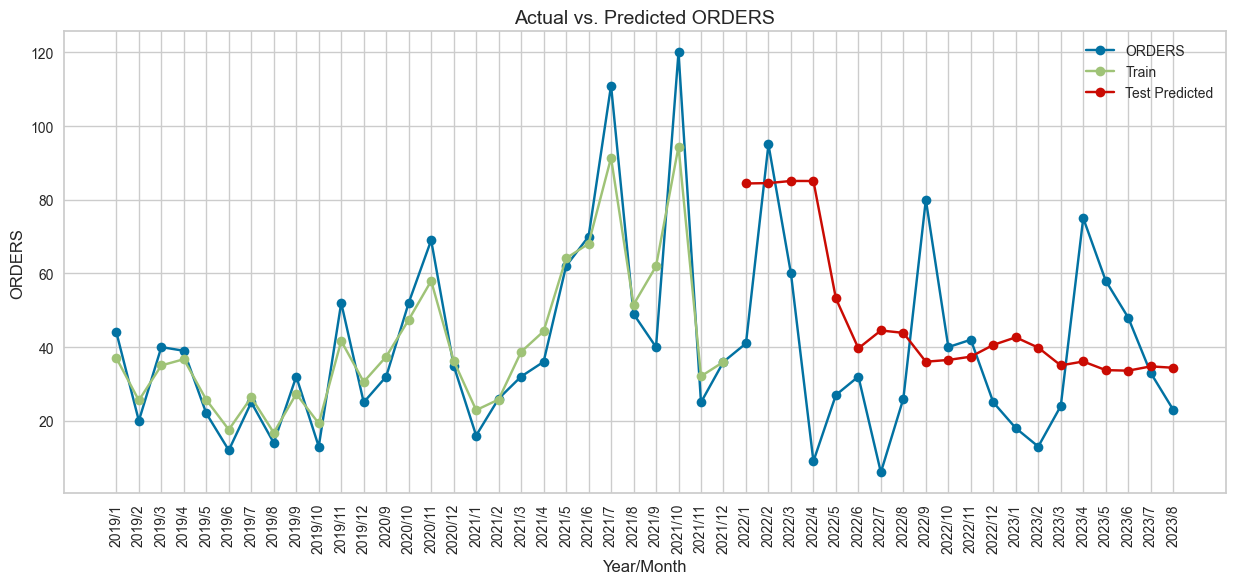

In [ ]:
# PLOT
train_actual_values = train['ORDERS'] # REAL ORDERS
train_predicted_values = predict_model(best, data=train)['prediction_label']
time_labels_real_orders = [f"{year}/{month}" for year, month in zip(data['YEAR'], data['MONTH'])]
time_labels_train = [f"{year}/{month}" for year, month in zip(train['YEAR'], train['MONTH'])]
time_labels_test = [f"{year}/{month}" for year, month in zip(test['YEAR'], test['MONTH'])]

plt.figure(figsize=(15, 6))

plt.plot(time_labels_real_orders, data['ORDERS'], label='ORDERS', marker='o')
plt.plot(time_labels_train, train_predicted_values, label='Train', marker='o')
# plt.plot(time_labels_test, actual_values, label='ORDERS', marker='o')
plt.plot(time_labels_test, predicted_values, label='Test Predicted', marker='o')

plt.xlabel('Year/Month', fontsize=12)
plt.ylabel('ORDERS', fontsize=12)
plt.legend()
plt.title('Actual vs. Predicted ORDERS', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Comments

From the above plot it seems like the model captures data behaviour but fails to predict the test values. I suppose this happens because the small size of the data does not allowed to recognize repetitive patterns eg. small and big differences in orders. I also tested to change fold parameter, change the train/test split and try to change MONTHS to sin cos transformation but all of them does not seems to have better performance

# Future Prediction

If we want to predict future values we need to have a prediction dataset with the desired dates in the future. IF we have trained a model with X features we need to have those X features also in the prediction dataset , becasue we will not have these features for the future for now i fill the features with zeroes.

In [ ]:
future_dates = pandas.date_range(start = '2023-09-01', end = '2024-09-01', freq = 'MS')

future_df = pandas.DataFrame()

future_df['YEAR'] = [i.year for i in future_dates] 
future_df['MONTH'] = [i.month for i in future_dates]
future_df['LME_CS'] = [0 for i in future_dates]
future_df['LME_3MONTH'] = [0 for i in future_dates]
future_df['LME_STOCK'] = [0 for i in future_dates]
future_df['EP_EU_NONH'] = [0 for i in future_dates]


In [ ]:
future_df

,YEAR,MONTH,LME_CS,LME_3MONTH,LME_STOCK,EP_EU_NONH
0,2023,9,0,0,0,0
1,2023,10,0,0,0,0
2,2023,11,0,0,0,0
3,2023,12,0,0,0,0
4,2024,1,0,0,0,0
5,2024,2,0,0,0,0
6,2024,3,0,0,0,0
7,2024,4,0,0,0,0
8,2024,5,0,0,0,0
9,2024,6,0,0,0,0


In [ ]:
final_best = finalize_model(best)
predictions_future = predict_model(final_best, data=future_df)
predictions_future

,YEAR,MONTH,LME_CS,LME_3MONTH,LME_STOCK,EP_EU_NONH,prediction_label
0,2023,9,0,0,0,0,41.50
1,2023,10,0,0,0,0,42.58
2,2023,11,0,0,0,0,41.69
3,2023,12,0,0,0,0,40.98
4,2024,1,0,0,0,0,35.53
5,2024,2,0,0,0,0,35.59
6,2024,3,0,0,0,0,35.50
7,2024,4,0,0,0,0,35.78
8,2024,5,0,0,0,0,35.56
9,2024,6,0,0,0,0,35.82


Even though in a senario where the model has been trained and produces good results in the test,I think that the prediction values here are totally "wrong" because there is no info for the features. We need to find other ways to create features if we want to use ML models in both training and prediction. For instance we can have features from past years/months for every record eg. for 2023/08 we can have the 'LME_CS','LME_3MONTH','LME_STOCK','EP_EU_NONH' of 2023/07 that they (may) be available.   